# <font color="#DE1509">Data Wrangling</font>
## Data Munging
Data wrangling, sometimes referred to as data munging, is the process of cleaning, managing, transforming, and formatting "raw" data into the form that is appropriate for downstream analyses.

\
Let's start with heart failure clinical records data.  
# โรคหัวใจ
  
There are 13 columns in this data:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (Y/N)
- high blood pressure: if the patient has hypertension (Y/N)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (Y/N)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (F/M)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (Y/N)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (Y/N)

**มี 13 คอลัมน์ในข้อมูลนี้:**

- **age** - อายุของผู้ป่วย (ปี)
- **anaemia** - ภาวะโลหิตจาง - เม็ดเลือดแดงหรือฮีโมโกลบินต่ำ (Y/N)
- **high blood pressure** - ผู้ป่วยมีความดันโลหิตสูงหรือไม่ (Y/N)
- **creatinine phosphokinase (CPK)** - ระดับเอนไซม์ CPK ในเลือด (mcg/L)
- **diabetes** - ผู้ป่วยเป็นเบาหวานหรือไม่ (Y/N)
- **ejection fraction** - สัดส่วนเลือดที่ถูกสูบออกจากหัวใจในแต่ละครั้งที่บีบตัว (เปอร์เซ็นต์)
- **platelets** - เกล็ดเลือด (กิโลเพลตเลต/mL)
- **sex** - เพศ หญิงหรือชาย (F/M)
- **serum creatinine** - ระดับครีเอตินินในเลือด (mg/dL)
- **serum sodium** - ระดับโซเดียมในเลือด (mEq/L)
- **smoking** - ผู้ป่วยสูบบุหรี่หรือไม่ (Y/N)
- **time** - ระยะเวลาติดตามผล (วัน)
- **death event** - ผู้ป่วยเสียชีวิตในช่วงติดตามผลหรือไม่ (Y/N)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/heart_failure_wNA.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,N,582.0,N,20.0,Y,265000.00,1.9,130,M,N,4.0,Y
1,55.0,N,NaN,N,38.0,N,263358.03,1.1,136,M,N,6.0,Y
2,65.0,N,146.0,NaN,20.0,N,162000.00,1.3,129,M,Y,7.0,Y
3,50.0,Y,111.0,N,20.0,N,210000.00,1.9,137,M,N,7.0,Y
4,65.0,Y,NaN,NaN,20.0,N,327000.00,2.7,116,F,N,8.0,Y


In [ ]:
df.shape

(299, 13)

\
We can see from the result of .info() that there are missing data in several columns.  
Also, dtype of some columns should be assigned as "category" instead of "object".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       279 non-null    float64
 1   anaemia                   284 non-null    object 
 2   creatinine_phosphokinase  204 non-null    float64
 3   diabetes                  202 non-null    object 
 4   ejection_fraction         294 non-null    float64
 5   high_blood_pressure       291 non-null    object 
 6   platelets                 287 non-null    float64
 7   serum_creatinine          296 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       293 non-null    object 
 10  smoking                   295 non-null    object 
 11  time                      297 non-null    float64
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 30.5+ KB


\
Change dtype of some columns to category:

In [ ]:
df = df.astype({
    'anaemia': 'category',
    'diabetes': 'category',
    'high_blood_pressure': 'category',
    'sex': 'category',
    'smoking': 'category',
    'DEATH_EVENT': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       279 non-null    float64 
 1   anaemia                   284 non-null    category
 2   creatinine_phosphokinase  204 non-null    float64 
 3   diabetes                  202 non-null    category
 4   ejection_fraction         294 non-null    float64 
 5   high_blood_pressure       291 non-null    category
 6   platelets                 287 non-null    float64 
 7   serum_creatinine          296 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       293 non-null    category
 10  smoking                   295 non-null    category
 11  time                      297 non-null    float64 
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(6), int64(1)
memory usage:

\
Use describe() to show overview of numeric columns:

In [ ]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,279.000000,204.000000,294.000000,287.000000,296.000000,299.000000,297.000000
mean,60.900839,530.362745,38.081633,263072.100070,1.389088,136.625418,130.501684
std,11.959235,918.805310,11.904346,99246.954728,1.032093,4.412477,77.704878
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,51.000000,110.750000,30.000000,211500.000000,0.900000,134.000000,73.000000
50%,60.000000,227.500000,38.000000,260000.000000,1.100000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,304000.000000,1.400000,140.000000,205.000000
max,95.000000,7702.000000,80.000000,850000.000000,9.400000,148.000000,285.000000


\
You can also change dtype of some numeric columns if high precision of decimal numbers is not required.  
For example, the age column.

In [ ]:
df = df.astype({
    'age': 'float16',
    'ejection_fraction': 'float16',
    'serum_creatinine': 'float16',
    'serum_sodium': 'int16'
})
df.head()

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,N,582.0,N,20.0,Y,265000.00,1.900391,130,M,N,4.0,Y
1,55.0,N,NaN,N,38.0,N,263358.03,1.099609,136,M,N,6.0,Y
2,65.0,N,146.0,NaN,20.0,N,162000.00,1.299805,129,M,Y,7.0,Y
3,50.0,Y,111.0,N,20.0,N,210000.00,1.900391,137,M,N,7.0,Y
4,65.0,Y,NaN,NaN,20.0,N,327000.00,2.699219,116,F,N,8.0,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       279 non-null    float16 
 1   anaemia                   284 non-null    category
 2   creatinine_phosphokinase  204 non-null    float64 
 3   diabetes                  202 non-null    category
 4   ejection_fraction         294 non-null    float16 
 5   high_blood_pressure       291 non-null    category
 6   platelets                 287 non-null    float64 
 7   serum_creatinine          296 non-null    float16 
 8   serum_sodium              299 non-null    int16   
 9   sex                       293 non-null    category
 10  smoking                   295 non-null    category
 11  time                      297 non-null    float64 
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float16(3), float64(3), int16(1)
m

What the number '16' after float means?  
Let's see precision & float dtypes:

In [ ]:
print(np.array([12.1234567891023], dtype=np.float16))
print(np.array([12.1234567891023], dtype=np.float32))
print(np.array([12.1234567891023], dtype=np.float64))

[12.125]
[12.123457]
[12.12345679]


\
We can use the argument include='all' in .describe() to show frequencies in categorical columns.

In [ ]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,279.000000,284,204.000000,202,294.00000,291,287.000000,296.000000,299.000000,293,295,297.000000,299
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,M,N,NaN,N
freq,NaN,161,NaN,120,NaN,189,NaN,NaN,NaN,190,201,NaN,203
mean,60.906250,NaN,530.362745,NaN,38.09375,NaN,263072.100070,1.389648,136.625418,NaN,NaN,130.501684,NaN
std,11.960938,NaN,918.805310,NaN,11.90625,NaN,99246.954728,1.032227,4.412477,NaN,NaN,77.704878,NaN
min,40.000000,NaN,23.000000,NaN,14.00000,NaN,25100.000000,0.500000,113.000000,NaN,NaN,4.000000,NaN
25%,51.000000,NaN,110.750000,NaN,30.00000,NaN,211500.000000,0.899902,134.000000,NaN,NaN,73.000000,NaN
50%,60.000000,NaN,227.500000,NaN,38.00000,NaN,260000.000000,1.099609,137.000000,NaN,NaN,115.000000,NaN
75%,70.000000,NaN,582.000000,NaN,45.00000,NaN,304000.000000,1.400391,140.000000,NaN,NaN,205.000000,NaN


&nbsp;  
#### <font color="#127C02">*Dealing with missing data*</font>

\
<font color="#029DA3">**Check for missing values**</font>

The .isnull() return True if a value is missing.  

In [ ]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,True,True,False,False,False,False,False,False,False,False
296,False,False,True,True,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


\
To check which column contains ANY missing value:

In [ ]:
df.isnull().any()

,0
age,True
anaemia,True
creatinine_phosphokinase,True
diabetes,True
ejection_fraction,True
high_blood_pressure,True
platelets,True
serum_creatinine,True
serum_sodium,False
sex,True


\
We can use .sum() to get a number of missing values in each column.

In [ ]:
df.isnull().sum()

,0
age,20
anaemia,15
creatinine_phosphokinase,95
diabetes,97
ejection_fraction,5
high_blood_pressure,8
platelets,12
serum_creatinine,3
serum_sodium,0
sex,6


\
Calculate a percentage of missing values for each column.

In [ ]:
per_missing = df.isnull().sum() / len(df) * 100
per_missing

,0
age,6.688963
anaemia,5.016722
creatinine_phosphokinase,31.772575
diabetes,32.441472
ejection_fraction,1.672241
high_blood_pressure,2.675585
platelets,4.013378
serum_creatinine,1.003344
serum_sodium,0.000000
sex,2.006689


\
<font color="#029DA3">**Removing missing values**</font>

\*Note that the procedure/method used to deal with missing values is case by case according to the nature of data, the goal of study, etc.  
  
In general, we can just remove rows with missing data if missing data are only a few.  
However, if there are many missing values, we will remove columns that contain missing data >= 30% (e.g., creatinine_phosphokinase and diabetes).  
  
  
Removing columns with %missing data >= 30%
- creatinine_phosphokinase
- diabetes

In [ ]:
df = df.loc[:, per_missing < 30]
df.isnull().sum() / len(df) * 100

,0
age,6.688963
anaemia,5.016722
ejection_fraction,1.672241
high_blood_pressure,2.675585
platelets,4.013378
serum_creatinine,1.003344
serum_sodium,0.000000
sex,2.006689
smoking,1.337793
time,0.668896


\
<font color="#029DA3">**Remove all rows with missing data (not recommended for this data)**</font>  
\
If we decide to remove rows, first, check the number of rows with missing data.

In [ ]:
df.isnull().any(axis=1).sum()

np.int64(68)

In [ ]:
df.isnull().any(axis=1).sum() / len(df) * 100

np.float64(22.74247491638796)

<font color="red">If we remove these rows, we lost ~23% of data!</font>

In [ ]:
#To remove all rows with missing data
#df = df.dropna(axis=0).head() #axis 0:rows, 1:columns

\
<font color="#029DA3">**Replace missing values**</font>  
\
After removing columns with missing values >= 30%, remaining missing values can be replaced by:
- mean/median for numeric data
- mode for category data
*Please note that there is no 'generic' way for 'what to replace' missing data, it is 'CASE-BY-CASE', you need to consider the nature of your data before replacing missing values*.

\
*Replace missing data with mean/median in numeric columns*:

In [ ]:
df2 = df.copy() #backup data
df2.age = df.age.fillna(df.age.mean()) #replace missing values with an average value

Now, there is no missing values in column age.

In [ ]:
df2.isnull().sum()

,0
age,0
anaemia,15
ejection_fraction,5
high_blood_pressure,8
platelets,12
serum_creatinine,3
serum_sodium,0
sex,6
smoking,4
time,2


\
However, is the mean suitable to be used as a replaced value?

age mean:  60.9
age median:  60.0


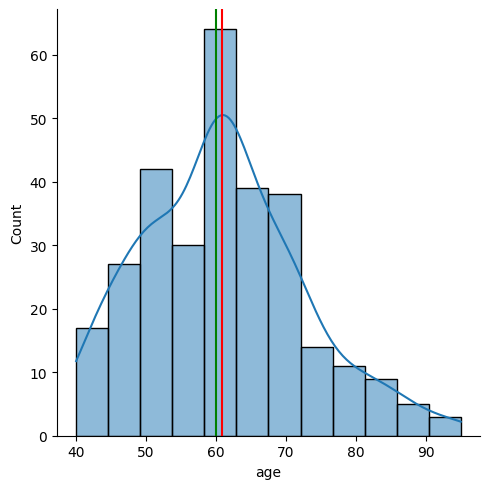

In [ ]:
sns.displot(df2.age, kde=True)
plt.axvline(df2.age.mean(), color='red')
plt.axvline(df2.age.median(), color='green')
print('age mean: ', df2.age.mean())
print('age median: ', df2.age.median())

In this case, mean and median is quite the same.

\
How about the time column?  
Is it suitable to replace missing values with the mean?

time mean:  130.5016835016835
time median:  115.0


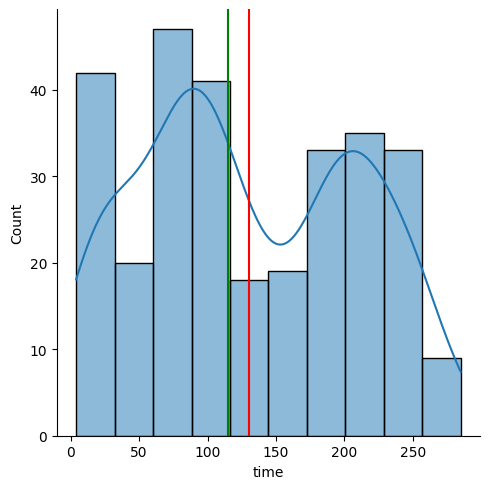

In [ ]:
sns.displot(df2.time, kde=True)
plt.axvline(df2.time.mean(), color='red')
plt.axvline(df2.time.median(), color='green')
print('time mean: ', df2.time.mean())
print('time median: ', df2.time.median())

For the time column, mean and median are quite different.  
To avoid the effect of outliers, we should replace missing values with median.

\
*Replace missing values with median in numeric columns*:

In [ ]:
df2.age = df.age.fillna(df.age.median())
df2.isnull().sum()

,0
age,0
anaemia,15
ejection_fraction,5
high_blood_pressure,8
platelets,12
serum_creatinine,3
serum_sodium,0
sex,6
smoking,4
time,2


\
We can use a for loop to replace missing values in all numeric columns.

In [ ]:
for col in df2.columns:
    if (df2[col].dtype != 'category'):
        df2[col] = df[col].fillna(df[col].median())
df2.isnull().sum()

,0
age,0
anaemia,15
ejection_fraction,0
high_blood_pressure,8
platelets,0
serum_creatinine,0
serum_sodium,0
sex,6
smoking,4
time,0


Next, we will dealing with missing values in categorical columns.

\
*Replace missing values in categorical columns*:

Let's consider the anaemia column.

In [ ]:
df2.anaemia.value_counts()

,count
anaemia,
N,161
Y,123


We can see that 'N' has higher frequency, so 'N' is the mode.

\
Alternatively, we can use .mode() to get a mode category.

In [ ]:
df2.anaemia.mode()

,anaemia
0,N


In [ ]:
df2.anaemia.mode()[0]

'N'

Replace missing values with a mode category.

In [ ]:
df2.anaemia = df2.anaemia.fillna(df2.anaemia.mode()[0])
df2.isnull().sum()

,0
age,0
anaemia,0
ejection_fraction,0
high_blood_pressure,8
platelets,0
serum_creatinine,0
serum_sodium,0
sex,6
smoking,4
time,0


Now, the column anaemia has no missing value.

\
We can use for loop to replace missing values in all categorical columns.

In [ ]:
for col in df2.columns:
    if (df2[col].dtype == 'category'):
        df2[col] = df[col].fillna(df[col].mode()[0])
df2.isnull().sum()

,0
age,0
anaemia,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0
smoking,0
time,0


In [ ]:
df2.describe(include='all')

,age,anaemia,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299,299.000000,299,299.000000,299.000000,299.000000,299,299,299.000000,299
unique,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,N,NaN,N,NaN,NaN,NaN,M,N,NaN,N
freq,NaN,176,NaN,197,NaN,NaN,NaN,196,205,NaN,203
mean,60.843750,NaN,38.062500,NaN,262948.805084,1.386719,136.625418,NaN,NaN,130.397993,NaN
std,11.554688,NaN,11.804688,NaN,97230.037595,1.027344,4.412477,NaN,NaN,77.454027,NaN
min,40.000000,NaN,14.000000,NaN,25100.000000,0.500000,113.000000,NaN,NaN,4.000000,NaN
25%,52.000000,NaN,30.000000,NaN,215000.000000,0.899902,134.000000,NaN,NaN,73.500000,NaN
50%,60.000000,NaN,38.000000,NaN,260000.000000,1.099609,137.000000,NaN,NaN,115.000000,NaN
75%,68.500000,NaN,45.000000,NaN,302000.000000,1.400391,140.000000,NaN,NaN,203.000000,NaN


\
<font color="#029DA3">**Making new category for missing values**</font>  
\
Alternatively, we can just make new category for missing values.  
However, this procedure should be done before converting column to category dtype.  
\
For example, in the sex column:

In [ ]:
#from the start
df3 = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/heart_failure_wNA.csv")

In [ ]:
df3.sex = df3.sex.fillna('A')

A means 'Agender' people (without a gender identity)

In [ ]:
df3.sex.value_counts()

,count
sex,
M,190
F,103
A,6


&nbsp;  
#### <font color="#127C02">*Categorical data & predictive model creation*</font>

In many cases, categorical data cannot be directly used to create a predictive model.  
Data in categorical columns need to be converted into numbers first before using them in the model training process.

\
<font color="#029DA3">**One hot encoding**</font>

The easiest way is to separate numeric and category data into 2 dataframes before the encoding process.

\
Numerical dataframes:

In [ ]:
df_numeric = df.loc[:, df.dtypes != 'category']
df_numeric.head()

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,20.0,265000.00,1.900391,130,4.0
1,55.0,38.0,263358.03,1.099609,136,6.0
2,65.0,20.0,162000.00,1.299805,129,7.0
3,50.0,20.0,210000.00,1.900391,137,7.0
4,65.0,20.0,327000.00,2.699219,116,8.0


\
Categorical dataframes:

In [ ]:
df_category = df.loc[:, df.dtypes == 'category']
df_category.head()

,anaemia,high_blood_pressure,sex,smoking,DEATH_EVENT
0,N,Y,M,N,Y
1,N,N,M,N,Y
2,N,N,M,Y,Y
3,Y,N,M,N,Y
4,Y,N,F,N,Y


\
Convert the categorical dataframe using 'one hot encoding'.  
This encoding can be done using get_dummies().

In [ ]:
df_category_1hot = pd.get_dummies(df_category, dtype=int)
df_category_1hot.head()

,anaemia_N,anaemia_Y,high_blood_pressure_N,high_blood_pressure_Y,sex_F,sex_M,smoking_N,smoking_Y,DEATH_EVENT_N,DEATH_EVENT_Y
0,1,0,0,1,0,1,1,0,0,1
1,1,0,1,0,0,1,1,0,0,1
2,1,0,1,0,0,1,0,1,0,1
3,0,1,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1


However, we don't need all the converted columns.  
For example, sex_F and sex_M, we just need only one of them. So, we specify drop_first=True in get_dummies().

In [ ]:
df_category_1hot = pd.get_dummies(df_category, drop_first=True, dtype=int)
df_category_1hot.head()

,anaemia_Y,high_blood_pressure_Y,sex_M,smoking_Y,DEATH_EVENT_Y
0,0,1,1,0,1
1,0,0,1,0,1
2,0,0,1,1,1
3,1,0,1,0,1
4,1,0,0,0,1


\
Merge 2 dataframes:   
numerical dataframe + encoded dataframe

In [ ]:
pd.concat([df_numeric, df_category_1hot], axis=1)

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_Y,high_blood_pressure_Y,sex_M,smoking_Y,DEATH_EVENT_Y
0,75.0,20.0,265000.00,1.900391,130,4.0,0,1,1,0,1
1,55.0,38.0,263358.03,1.099609,136,6.0,0,0,1,0,1
2,65.0,20.0,162000.00,1.299805,129,7.0,0,0,1,1,1
3,50.0,20.0,210000.00,1.900391,137,7.0,1,0,1,0,1
4,65.0,20.0,327000.00,2.699219,116,8.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,38.0,155000.00,1.099609,143,270.0,0,1,1,1,0
295,55.0,NaN,270000.00,1.200195,139,271.0,0,0,0,0,0
296,45.0,60.0,742000.00,0.799805,138,278.0,0,0,0,0,0
297,45.0,38.0,140000.00,1.400391,140,280.0,0,0,1,1,0


---

&nbsp;  
#### <font color="#127C02">*Date / Time*</font>
In many cases, we need to perform analysis about date and time.  
When the data is imported by read_csv(), columns that contain information about date/time are still not ready for further analysis.  
We need to convert these columns to the type that suitable for them.

\
In this example, we will use the "person_info.csv" data.
- Name: volunteer's name  
- DateOfBirth: volunteer's date of birth  
- Height, weight: height and weight
- Email: email address
- TestA/B/C: scores of test A/B/C, all tests must be taken in the same day
- TestDate: date of tests (ddmmyy)
- TestStart: test start time
- TestEnd: test end time

In [ ]:
df_personInfo = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/refs/heads/main/dataset/person_info.csv")
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd
0,Beauden Bree,11 Jan 1985,175,65,BeaudenB@mail.com,70,36,87,250721,14:00,15:10
1,Brendon Wilkie,14 Jun 1979,184,74,BrendonW@mail.com,55,74,42,140921,9:30,11:14
2,Eden Eugene,2 Nov 1990,167,79,EdenE@mail.com,68,11,69,201021,11:00,13:20
3,Lynton Wilburn,24 Aug 1983,155,58,LyntonW@mail.com,25,29,38,100122,10:30,12:00
4,Clemence Gladys,4 Dec 2018,176,80,ClemenceG@mail.com,40,35,78,121221,16:00,18:15
5,Triss Merigold,31 Dec 1985,156,80,TrisM@mail.com,40,30,76,141221,15:00,17:15


\
Dtypes of columns DateOfBirth, TestDate, TestStart and TestEnd are initially not date/time-related.

In [ ]:
df_personInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6 non-null      object
 1   DateOfBirth  6 non-null      object
 2   Height       6 non-null      int64 
 3   Weight       6 non-null      int64 
 4   Email        6 non-null      object
 5   TestA        6 non-null      int64 
 6   TestB        6 non-null      int64 
 7   TestC        6 non-null      int64 
 8   TestDate     6 non-null      int64 
 9   TestStart    6 non-null      object
 10  TestEnd      6 non-null      object
dtypes: int64(6), object(5)
memory usage: 660.0+ bytes


\
<font color="#029DA3">**Dtype of date/time**</font>  
Change dtype of the column DateOfBirth to 'datetime' using pd.to_datetime():

In [ ]:
df_personInfo.DateOfBirth = pd.to_datetime(df_personInfo.DateOfBirth)
df_personInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         6 non-null      object        
 1   DateOfBirth  6 non-null      datetime64[ns]
 2   Height       6 non-null      int64         
 3   Weight       6 non-null      int64         
 4   Email        6 non-null      object        
 5   TestA        6 non-null      int64         
 6   TestB        6 non-null      int64         
 7   TestC        6 non-null      int64         
 8   TestDate     6 non-null      int64         
 9   TestStart    6 non-null      object        
 10  TestEnd      6 non-null      object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 660.0+ bytes


In [ ]:
df_personInfo.DateOfBirth

,DateOfBirth
0,1985-01-11
1,1979-06-14
2,1990-11-02
3,1983-08-24
4,2018-12-04
5,1985-12-31


\
But, if we use pd.to_datetime() with TestDate, we will get weird results.

In [ ]:
df_personInfo.TestDate

,TestDate
0,250721
1,140921
2,201021
3,100122
4,121221
5,141221


In [ ]:
pd.to_datetime(df_personInfo.TestDate)

,TestDate
0,1970-01-01 00:00:00.000250721
1,1970-01-01 00:00:00.000140921
2,1970-01-01 00:00:00.000201021
3,1970-01-01 00:00:00.000100122
4,1970-01-01 00:00:00.000121221
5,1970-01-01 00:00:00.000141221


\
Since the format of column TestDate is 'ddmmyy', we need to specify this format in pd.to_datetime().

In [ ]:
df_personInfo.TestDate = pd.to_datetime(df_personInfo.TestDate, format="%d%m%y")
df_personInfo.TestDate
#see https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

,TestDate
0,2021-07-25
1,2021-09-14
2,2021-10-20
3,2022-01-10
4,2021-12-12
5,2021-12-14


\
<font color="#029DA3">**Calculate age from DateOfBirth**</font>  
Suppose we want to know current volunteer age.   
To calculate current age, we need to know the current date. To get the current date, we need to import the library datetime.

In [ ]:
import datetime as dt

\
Using for loop to calculate current age.  
If we consider only difference in years between current year and year of the date of birth (dob).

In [ ]:
ages = []
for dob in df_personInfo.DateOfBirth:
    ages.append(dt.datetime.now().year - dob.year)
ages

df_personInfo['age'] = ages
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,15:00,17:15,40


\
Now we consider the difference in months between today and dob to calculate age.

In case of Beauden Bree:

In [ ]:
#in case of Clemence Gladys
today = dt.datetime.now()
diff_m = 12 * (today.year - df_personInfo.DateOfBirth[0].year) + (
    today.month - df_personInfo.DateOfBirth[0].month)
print("age year: ", diff_m // 12)  # operator // means floor division
print("age month:", diff_m % 12)

age year:  40
age month: 11


Using for loop:

In [ ]:
today = dt.datetime.now()
ages_m = []
for dob in df_personInfo.DateOfBirth:
    diff_m = 12 * (today.year - dob.year) + (today.month - dob.month)
    ages_m.append(diff_m)
type(ages_m)

df_personInfo['age'] = [m // 12 for m in ages_m]
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7


\
Alternatively, we can use list comprehension:

In [ ]:
ages_m = [(12 * (today.year - dob.year) + (today.month - dob.month)) // 12
          for dob in df_personInfo.DateOfBirth]
ages_m

[40, 46, 35, 42, 7, 40]

\
Or using the apply function:

In [ ]:
#remove column age first
del df_personInfo['age']
#<or> df_personInfo = df_personIanfo.drop(['age'], axis = 1)
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15


Create function for using in apply():

In [ ]:
def cal_age(dob):
    today = dt.datetime.now()
    diff_m = 12 * (today.year - dob.year) + (today.month - dob.month)
    return diff_m // 12


df_personInfo['age'] = df_personInfo.DateOfBirth.apply(cal_age)
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7


\
Or using lambda:

In [ ]:
#using apply and lambda
del df_personInfo['age']
today = dt.datetime.now()
df_personInfo['age'] = df_personInfo.DateOfBirth.apply(lambda dob: (12 * (
    today.year - dob.year) + (today.month - dob.month)) // 12)
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7


\
<font color="#029DA3">**Calculate age at a specific date**</font>  
Suppose we want to know volunteer age at the test date.  
We need to calculate the difference between the test date and dob.

\
Using apply():

In [ ]:
#using apply and function
def cal_age_testDate(row):
    diff_m = 12 * (row['TestDate'].year - row['DateOfBirth'].year) + (
        row['TestDate'].month - row['DateOfBirth'].month)
    return diff_m // 12


df_personInfo['age_testDate'] = df_personInfo.apply(cal_age_testDate, axis=1)
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40,36
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46,42
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35,30
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42,38
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7,3


\
Using apply & lambda:

In [ ]:
#using apply and lambda
df_personInfo['age_testDate'] = df_personInfo.apply(
    lambda row: (12 * (row['TestDate'].year - row['DateOfBirth'].year) +
                 (row['TestDate'].month - row['DateOfBirth'].month)) // 12,
    axis=1)
df_personInfo.head()

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40,36
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46,42
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35,30
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42,38
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7,3


\
<font color="#029DA3">**Time**</font>  
If we want to calculate test duration from TestStart and TestEnd.  
First, we need to convert columns TestStart and TestEnd to time.  

In [ ]:
df_personInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          6 non-null      object        
 1   DateOfBirth   6 non-null      datetime64[ns]
 2   Height        6 non-null      int64         
 3   Weight        6 non-null      int64         
 4   Email         6 non-null      object        
 5   TestA         6 non-null      int64         
 6   TestB         6 non-null      int64         
 7   TestC         6 non-null      int64         
 8   TestDate      6 non-null      datetime64[ns]
 9   TestStart     6 non-null      object        
 10  TestEnd       6 non-null      object        
 11  age           6 non-null      int64         
 12  age_testDate  6 non-null      int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 756.0+ bytes


\
You can simply use pd.to_datetime().  
However, current year and month will added in the conversion.

In [ ]:
start_test = pd.to_datetime(df_personInfo.TestStart)
end_test = pd.to_datetime(df_personInfo.TestEnd)

print(start_test)
print(end_test)

0   2025-12-19 14:00:00
1   2025-12-19 09:30:00
2   2025-12-19 11:00:00
3   2025-12-19 10:30:00
4   2025-12-19 16:00:00
5   2025-12-19 15:00:00
Name: TestStart, dtype: datetime64[ns]
0   2025-12-19 15:10:00
1   2025-12-19 11:14:00
2   2025-12-19 13:20:00
3   2025-12-19 12:00:00
4   2025-12-19 18:15:00
5   2025-12-19 17:15:00
Name: TestEnd, dtype: datetime64[ns]


/tmp/ipython-input-2026984363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  start_test = pd.to_datetime(df_personInfo.TestStart)
/tmp/ipython-input-2026984363.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  end_test = pd.to_datetime(df_personInfo.TestEnd)


\
To correct this problem, we need to include information of TestDate before the conversion.  
However, we need to convert TestDate to string first.

In [ ]:
TestDate_str = [
    d.strftime('%Y-%m-%d') + " " for d in df_personInfo.TestDate
]  #here we put space after date to separate date and time when concatenating date and time
TestDate_str

['2021-07-25 ',
 '2021-09-14 ',
 '2021-10-20 ',
 '2022-01-10 ',
 '2021-12-12 ',
 '2021-12-14 ']

Concatenate TestDate_str with TestStart and TestEnd.  
Then covert to datetime type.

In [ ]:
start_test = pd.to_datetime(TestDate_str + df_personInfo.TestStart)
end_test = pd.to_datetime(TestDate_str + df_personInfo.TestEnd)

print(start_test)
print(end_test)

0   2021-07-25 14:00:00
1   2021-09-14 09:30:00
2   2021-10-20 11:00:00
3   2022-01-10 10:30:00
4   2021-12-12 16:00:00
5   2021-12-14 15:00:00
Name: TestStart, dtype: datetime64[ns]
0   2021-07-25 15:10:00
1   2021-09-14 11:14:00
2   2021-10-20 13:20:00
3   2022-01-10 12:00:00
4   2021-12-12 18:15:00
5   2021-12-14 17:15:00
Name: TestEnd, dtype: datetime64[ns]


\
We can simply use pd.date_range() to calculate for a test duration.  
However, the result will exceed 1 minute.

In [ ]:
for i in range(len(start_test)):
    diff = len(pd.date_range(start=start_test[i], end=end_test[i], freq='min'))
    print(diff)

71
105
141
91
136
136


\
So, we just minus 1:

In [ ]:
for i in range(len(start_test)):
    diff = len(pd.date_range(start=start_test[i], end=end_test[i],
                             freq='min')) - 1
    print(diff)

70
104
140
90
135
135


In [ ]:
df_personInfo['Test_duration_min'] = df_personInfo.apply(lambda df: len(
    pd.date_range(start=pd.to_datetime(df['TestStart']),
                  end=pd.to_datetime(df['TestEnd']),
                  freq='min')) - 1,
                                                         axis=1)
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration_min
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,39,36,70
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,45,42,104
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,34,30,140
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,41,38,90
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,6,3,135
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,15:00,17:15,39,36,135


\
As you see above, the code is quite complex, so we can just calculate for differences in minute.

In [ ]:
def cal_test_duration(row):
    start = pd.to_datetime(row['TestStart'])
    end = pd.to_datetime(row['TestEnd'])
    diff_min = 60 * (end.hour - start.hour) + (end.minute - start.minute)
    return diff_min

In [ ]:
df_personInfo['Test_duration_min'] = df_personInfo.apply(cal_test_duration,
                                                         axis=1)
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration_min
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40,36,70
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46,42,104
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35,30,140
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42,38,90
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7,3,135
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,15:00,17:15,40,36,135


\
<font color="#029DA3">**Time delta**</font>  
We can just convert TestStart and TestEnd columns to time delta and find differences.  

In [ ]:
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,14:00,15:10,40,36
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,9:30,11:14,46,42
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,11:00,13:20,35,30
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,10:30,12:00,42,38
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,16:00,18:15,7,3
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,15:00,17:15,40,36


In [ ]:
del df_personInfo['Test_duration_min']
df_personInfo

KeyError: 'Test_duration_min'

The use of pd.to_timedelta() require input in the "hh\:mm:ss" format.  
So, we will append the string of seconds to TestStart and TestEnd columns.

In [ ]:
df_personInfo.TestStart = pd.to_timedelta(df_personInfo.TestStart + ':00')
df_personInfo.TestEnd = pd.to_timedelta(df_personInfo.TestEnd + ':00')
df_personInfo.head()
df_personInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Name          6 non-null      object         
 1   DateOfBirth   6 non-null      datetime64[ns] 
 2   Height        6 non-null      int64          
 3   Weight        6 non-null      int64          
 4   Email         6 non-null      object         
 5   TestA         6 non-null      int64          
 6   TestB         6 non-null      int64          
 7   TestC         6 non-null      int64          
 8   TestDate      6 non-null      datetime64[ns] 
 9   TestStart     6 non-null      timedelta64[ns]
 10  TestEnd       6 non-null      timedelta64[ns]
 11  age           6 non-null      int64          
 12  age_testDate  6 non-null      int64          
dtypes: datetime64[ns](2), int64(7), object(2), timedelta64[ns](2)
memory usage: 756.0+ bytes


In [ ]:
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,40,36
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,46,42
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,35,30
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,42,38
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,7,3
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,40,36


\
Then, we just create new column as shown below:

In [ ]:
df_personInfo['Test_duration'] = df_personInfo.TestEnd - df_personInfo.TestStart
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,40,36,0 days 01:10:00
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,46,42,0 days 01:44:00
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,35,30,0 days 02:20:00
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,42,38,0 days 01:30:00
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,7,3,0 days 02:15:00
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,40,36,0 days 02:15:00


\
We can format values in Test_duration using attribute components.  
For example, components of Test_duration of the first row.

In [ ]:
df_personInfo.Test_duration[0].components

Components(days=0, hours=1, minutes=10, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)

In [ ]:
df_personInfo.Test_duration[0].components.hours

1

Now, create new column to show durations in 'Xhr Xmin':

In [ ]:
df_personInfo['Test_duration_str'] = [
    f"{du.components.hours}hr {du.components.minutes}min"
    for du in df_personInfo.Test_duration
]
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration,Test_duration_str
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,39,36,0 days 01:10:00,1hr 10min
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,45,42,0 days 01:44:00,1hr 44min
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,34,30,0 days 02:20:00,2hr 20min
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,41,38,0 days 01:30:00,1hr 30min
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,6,3,0 days 02:15:00,2hr 15min
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,39,36,0 days 02:15:00,2hr 15min


---

&nbsp;  
#### <font color="#127C02">*String*</font>

Actually, dtype can be changed to String, but it is not so different from the object dtype.

In [ ]:
df_personInfo = df_personInfo.astype({'Name': 'string', 'Email': 'string'})
df_personInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Name               6 non-null      string         
 1   DateOfBirth        6 non-null      datetime64[ns] 
 2   Height             6 non-null      int64          
 3   Weight             6 non-null      int64          
 4   Email              6 non-null      string         
 5   TestA              6 non-null      int64          
 6   TestB              6 non-null      int64          
 7   TestC              6 non-null      int64          
 8   TestDate           6 non-null      datetime64[ns] 
 9   TestStart          6 non-null      timedelta64[ns]
 10  TestEnd            6 non-null      timedelta64[ns]
 11  age                6 non-null      int64          
 12  age_testDate       6 non-null      int64          
 13  Test_duration      6 non-null      timedelta64[ns]
 14

\
<font color="#029DA3">**Replacing String value**</font>  
Suppose we have new column 'Gender'.

In [ ]:
df_personInfo['Gender'] = ['F', 'M', 'F', 'M', 'F', 'F']
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration,Gender
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,40,36,0 days 01:10:00,F
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,46,42,0 days 01:44:00,M
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,35,30,0 days 02:20:00,F
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,42,38,0 days 01:30:00,M
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,7,3,0 days 02:15:00,F
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,40,36,0 days 02:15:00,F


\
We want to change value:  
M -> Male  
F -> Female  
\
We can do this by using .replace():

In [ ]:
df_personInfo.Gender = df_personInfo.Gender.replace(['F', 'M'],
                                                    ['Female', 'Male'])
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration,Gender
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,40,36,0 days 01:10:00,Female
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,46,42,0 days 01:44:00,Male
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,35,30,0 days 02:20:00,Female
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,42,38,0 days 01:30:00,Male
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,7,3,0 days 02:15:00,Female
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,40,36,0 days 02:15:00,Female


\
<font color="#029DA3">**Split column**</font>  
We use str.split() to split one columns into more columns.  
For instance, split Name into FName and LName.

In [ ]:
df_personInfo[['FName', 'Lname']] = df_personInfo.Name.str.split(expand=True)
#By default pat=None -> split on whitespace

#By default expand=False:
# expand=True -> return DataFrame/MultiIndex expanding dimensionality.
# expand=False -> return return Series/Index, containing lists of strings.
df_personInfo

,Name,DateOfBirth,Height,Weight,Email,TestA,TestB,TestC,TestDate,TestStart,TestEnd,age,age_testDate,Test_duration,Gender,FName,Lname
0,Beauden Bree,1985-01-11,175,65,BeaudenB@mail.com,70,36,87,2021-07-25,0 days 14:00:00,0 days 15:10:00,40,36,0 days 01:10:00,Female,Beauden,Bree
1,Brendon Wilkie,1979-06-14,184,74,BrendonW@mail.com,55,74,42,2021-09-14,0 days 09:30:00,0 days 11:14:00,46,42,0 days 01:44:00,Male,Brendon,Wilkie
2,Eden Eugene,1990-11-02,167,79,EdenE@mail.com,68,11,69,2021-10-20,0 days 11:00:00,0 days 13:20:00,35,30,0 days 02:20:00,Female,Eden,Eugene
3,Lynton Wilburn,1983-08-24,155,58,LyntonW@mail.com,25,29,38,2022-01-10,0 days 10:30:00,0 days 12:00:00,42,38,0 days 01:30:00,Male,Lynton,Wilburn
4,Clemence Gladys,2018-12-04,176,80,ClemenceG@mail.com,40,35,78,2021-12-12,0 days 16:00:00,0 days 18:15:00,7,3,0 days 02:15:00,Female,Clemence,Gladys
5,Triss Merigold,1985-12-31,156,80,TrisM@mail.com,40,30,76,2021-12-14,0 days 15:00:00,0 days 17:15:00,40,36,0 days 02:15:00,Female,Triss,Merigold


Columns FName and Lname are put in the back. So, we rearrange the order of columns.

In [ ]:
df_personInfo = df_personInfo[[
    'FName', 'Lname', 'DateOfBirth', 'Height', 'Weight', 'Email', 'TestA',
    'TestB', 'TestC', 'TestDate', 'TestStart', 'TestEnd', 'age', 'age_testDate',
    'Test_duration', 'Test_duration_str', 'Gender'
]]
df_personInfo

KeyError: "['Test_duration_str'] not in index"

\
<font color="#029DA3">**Separate column by year, month, day**</font>  
For example, we want to separate DateOfBirth by year, month, day.  
First, we need to convert DateOfBirth to string.  

In [ ]:
df_personInfo.DateOfBirth.dt.strftime('%Y-%m-%d')

,DateOfBirth
0,1985-01-11
1,1979-06-14
2,1990-11-02
3,1983-08-24
4,2018-12-04
5,1985-12-31


\
Then use str.split():

In [ ]:
df_dob = pd.DataFrame()
df_dob[['Year', 'Month','Day']] = df_personInfo.DateOfBirth.dt.strftime('%Y-%m-%d').str.split(pat="-", expand=True)
df_dob

,Year,Month,Day
0,1985,01,11
1,1979,06,14
2,1990,11,02
3,1983,08,24
4,2018,12,04
5,1985,12,31
